In [0]:
import os
import zipfile
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
local_zip = "/content/gdrive/My Drive/Colab Notebooks/Notes-Seperator-Dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/Colab Notebooks/Notes-Seperator Dataset.zip') #content/gdrive/My Drive/Colab Notebooks/Notes-Seperator Dataset.zip
zip_ref.close()

In [0]:
# Directory with our training notes pictures
train_notes_dir = os.path.join('/content/gdrive/My Drive/Colab Notebooks/Notes-Seperator-Dataset (1).zip/Notes-Seperator-Dataset/Notes') #content/gdrive/My Drive/Colab Notebooks/Notes-Seperator Dataset.zip/Notes-Seperator Dataset/Non-Notes

# Directory with our training non-notes pictures
train_non_notes_dir = os.path.join('/content/gdrive/My Drive/Colab Notebooks/Notes-Seperator-Dataset (1).zip/Notes-Seperator-Dataset/Non-Notes')

In [0]:
train_notes_names = os.listdir(train_notes_dir)
print(train_notes_names[:10])

train_non_notes_names = os.listdir(train_non_notes_dir)
print(train_non_notes_names[:10])

['229.jpg', '283.jpg', '285.jpg', '284.jpg', '286.jpg', '287.jpg', '291.jpg', '289.jpg', '290.jpg', '288.jpg']
['112.jpg', '111.jpg', '110.jpg', '109.jpg', '108.jpg', '107.jpg', '106.jpg', '105.jpg', '104.jpg', '103.jpg']


In [0]:
print('total training notes images:', len(os.listdir(train_notes_dir)))
print('total training non-notes images:', len(os.listdir(train_non_notes_dir)))

total training notes images: 1008
total training non-notes images: 111


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

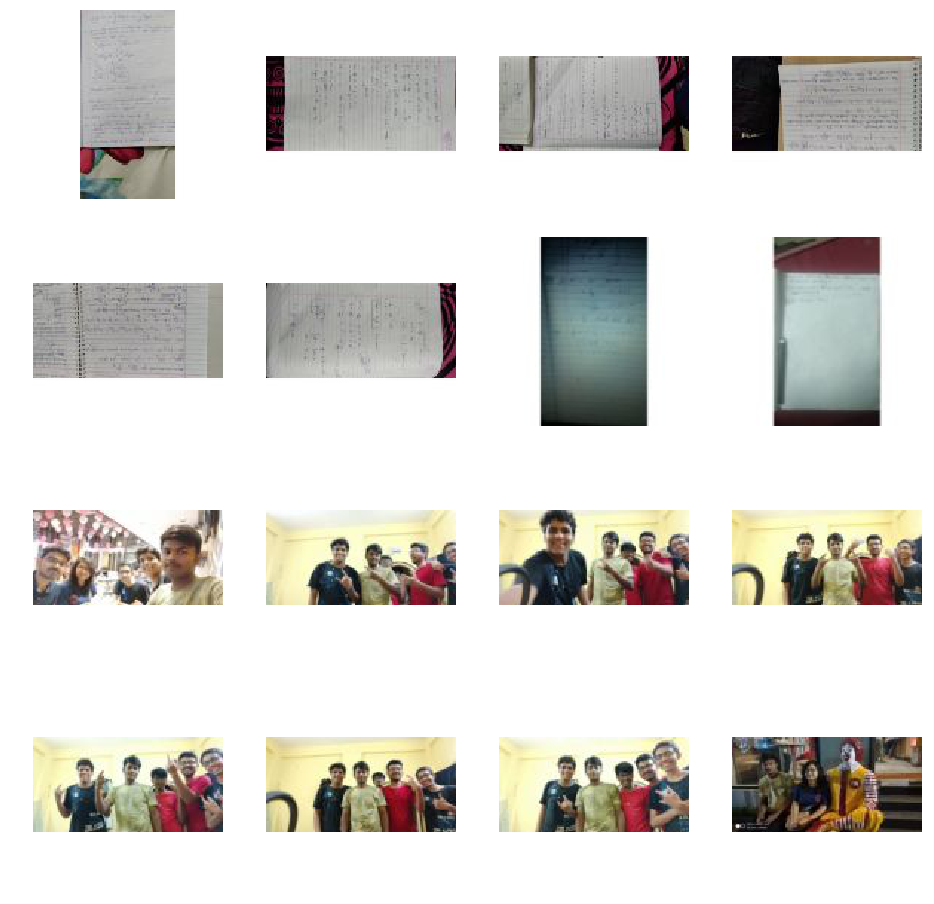

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_notes_pix = [os.path.join(train_notes_dir, fname) 
                for fname in train_notes_names[pic_index-8:pic_index]]
next_non_notes_pix = [os.path.join(train_non_notes_dir, fname) 
                for fname in train_non_notes_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_notes_pix+next_non_notes_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(24, (4,4), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('notes') and 1 for the other ('non-notes')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0624 05:37:18.387384 139831120004992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 24)      1176      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        6944      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0624 05:37:42.923317 139831120004992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(128, 128),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=1500,
      verbose=1)

Epoch 1/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.7073 - acc: 0.3750
Epoch 2/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.6376 - acc: 0.7500
Epoch 3/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.6778 - acc: 0.7500
Epoch 4/1500
8/8 [==============================] - 0s 14ms/step - loss: 0.5369 - acc: 0.8750
Epoch 5/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.9157 - acc: 0.7500
Epoch 6/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.6461 - acc: 0.7500
Epoch 7/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.4183 - acc: 0.6250
Epoch 8/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.3265 - acc: 0.8750
Epoch 9/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.4387 - acc: 0.7500
Epoch 10/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0593 - acc: 1.0000
Epoch 11/1500
8/8 [==============================] - 0s 9ms/st

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a note")
  else:
    print(fn + " is a non-note")
 

Saving non-notes92.jpg to non-notes92 (3).jpg
[0.]
non-notes92.jpg is a non-note


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


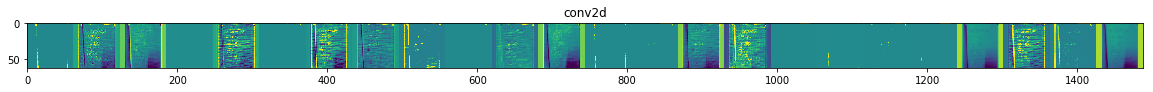

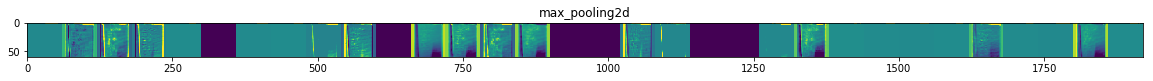

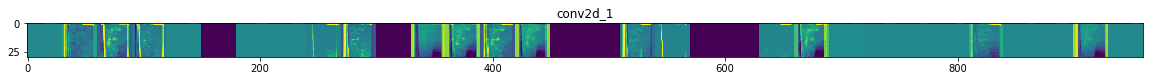

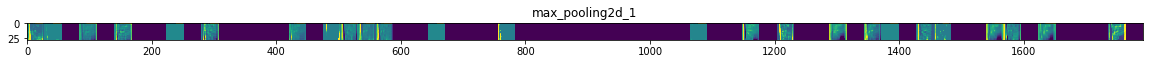

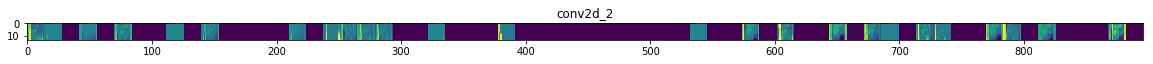

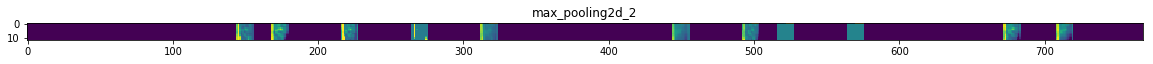

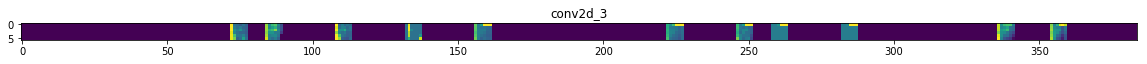

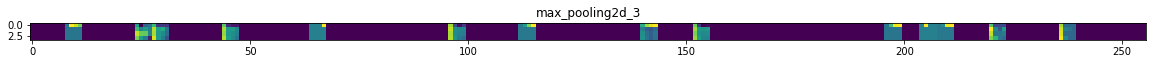

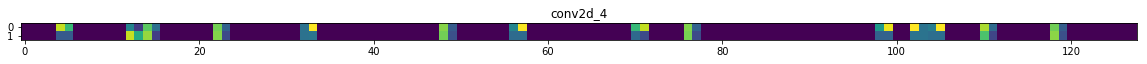

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
notes_img_files = [os.path.join(train_notes_dir, f) for f in train_notes_names]
non_notes_img_files = [os.path.join(train_non_notes_dir, f) for f in train_non_notes_names]
img_path = random.choice(notes_img_files + non_notes_img_files)

img = load_img(img_path, target_size=(128, 128))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')